# Assignment 2:
# Residential Energy Appliance Classification

# Group Details:
- Group No: 23
- Srinithi Punniamurphy, 31284868
- Chaitanya Srinevas, 31216072
- Alonso Henry Gomez Zeballos, 31399835

## 1. Introduction
Non-intrusive load monitoring  is defined as the process of estimating the energy consumption of individual appliances from electric power measurements This approach reduces sensing infrastructure costs by relying on machine learning techniques to monitor electric loads. 

Through this project we develop and present a comprehensive set of  different machine learning classification algorithms that best performs on the appliance usage and generates the best F1 score by selecting the best model for individual appliances. Using the dataset provided, we tried to analyse the data based on time series analysis to study trends in the appliance usage and understand the patterns.  Based on the exploratory data analysis, suitable classification algorithms were applied for each appliance. Subsequently the inference task established the focus was on identifying features from the dataset that exert strong influence on the prediction results and indicating strong drivers in the usage of the appliance.

### 1.1. Read in Data
Two *csv* files were given:
- **train_data_withlabels.csv** which will be used for training the model.
- **test_data_nolabels.csv** which will be used for testing the model and give predictions.

Bot *csv* files include the following features:
- **load**: smart meter reading.
- **ac**: 1 means air conditioner is turned on and 0 otherwise
- **ev**: 1 means electric vehicle charger is turned on and 0 otherwise
- **oven**: 1 means over machine is turned on and 0 otherwise
- **wash**: 1 means washer machine is turned on and 0 otherwise
- **dryer**: 1 means dryer machine is turned on and 0 otherwise
- **hourofday**: Hour of the day when the measurement was recorded.
- **dayofweek**: Day of the week when the measurement was recorded.
- **dif**: Difference between two sequential load data points.
- **absdif**: Absolute value of difference (dif).
- **max**: Max value of load over a neighborhood time window.
- **var**: Variance of load over a neighborhood time window of 30 minutes around each load data point.
- **entropy**: Measures the "forecastability" of a time series data.
- **nonlinear**: Used in Terasvirta's nonlinearity test.
- **hurst**: Measure of the long-term memory of a time series.

In [227]:
# Useful Packages
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import os # accessing directory structure
import seaborn as sns

In [228]:
# Read in data
def read_data(file_name):
    '''Read in data from CSV file. It returns a dataframe'''
    data_input = pd.read_csv(file_name, encoding='utf-8')
    
    return data_input

In [229]:
# Read in Train data from CSV file.
train_data_file = 'train_data_withlabels.csv'
df_train = read_data(train_data_file)

# shape of data
print(df_train.shape)

# First look at the data
df_train.head()

(417720, 16)


,Unnamed: 0,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,105541,2.245,0,0,0,0,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,105542,2.259,0,0,0,0,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,105543,2.269,0,0,0,0,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,105544,2.268,0,0,0,0,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,105545,2.270,0,0,0,0,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


In [230]:
# Read in Test data from CSV file
test_data_file = 'test_data_nolabels.csv'
df_test = read_data(test_data_file)

# shape of data
print(df_test.shape)

# First look at the data
df_test.head()

(105540, 11)


,Unnamed: 0,load,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,1,1.869,0,Mon,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2,1.673,0,Mon,-0.196,0.196,0.0,0.0,0.0,0.0,0.0
2,3,1.660,0,Mon,-0.013,0.013,0.0,0.0,0.0,0.0,0.0
3,4,1.772,0,Mon,0.112,0.112,0.0,0.0,0.0,0.0,0.0
4,5,1.679,0,Mon,-0.093,0.093,0.0,0.0,0.0,0.0,0.0


We can see in both Training Dataset and Testing Dataset there is a column called `Unnamed: 0` that seems to be useless. Another finding is `dayofweek` is a categorical variable so we need to enconde that feature to be used while training and testing our models. This one as well as the analysis of each column will be conducted in the next section to extract insight of it and find whether there is any problems or consideration for preparing the dataset before builind machine leaning models. 

### 1.2. Data Preprocessing
The goal in this section is to prepare the datasets and get them ready to be used when training and testing the machine learning models we will propose when performing the classification task.

In [231]:
# Number of rows and columns we are dealing with
df_train.shape

(417720, 16)

In [232]:
# Data type for each column (feature)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417720 entries, 0 to 417719
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  417720 non-null  int64  
 1   load        417720 non-null  float64
 2   ac          417720 non-null  int64  
 3   ev          417720 non-null  int64  
 4   oven        417720 non-null  int64  
 5   wash        417720 non-null  int64  
 6   dryer       417720 non-null  int64  
 7   hourofday   417720 non-null  int64  
 8   dayofweek   417720 non-null  object 
 9   dif         417720 non-null  float64
 10  absdif      417720 non-null  float64
 11  max         417720 non-null  float64
 12  var         417720 non-null  float64
 13  entropy     417720 non-null  float64
 14  nonlinear   417720 non-null  float64
 15  hurst       417720 non-null  float64
dtypes: float64(8), int64(7), object(1)
memory usage: 51.0+ MB


As it has said previously, `dayofweek` is an *object* Dtype that means we are dealing with a categorical variable. Lately, in this section this feature will be encode.

In [233]:
# checking null values
df_train.isna().sum()

Unnamed: 0    0
load          0
ac            0
ev            0
oven          0
wash          0
dryer         0
hourofday     0
dayofweek     0
dif           0
absdif        0
max           0
var           0
entropy       0
nonlinear     0
hurst         0
dtype: int64

In [234]:
#printing unique values for each column
for columns in df_train.columns:
    #print(i)
    print(len(df_train[columns].unique()))

417720
8958
2
2
2
2
2
24
7
10141
5925
7083
416646
417691
417674
404510


There are not missing values so there is no need to perform an imputation task.

In [235]:
# Drop useless columns
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,0,0,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,0,0,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,0,0,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,0,0,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,0,0,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


In [236]:
#Data Preprocessing
# Drop useless columns
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test.head()

,load,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,1.869,0,Mon,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,1.673,0,Mon,-0.196,0.196,0.0,0.0,0.0,0.0,0.0
2,1.660,0,Mon,-0.013,0.013,0.0,0.0,0.0,0.0,0.0
3,1.772,0,Mon,0.112,0.112,0.0,0.0,0.0,0.0,0.0
4,1.679,0,Mon,-0.093,0.093,0.0,0.0,0.0,0.0,0.0


Useless columns such as `Unnamed: 0` are dropped because they are not part of the group of feature to be used when making a prediction about the appliance usage.

In [237]:
# Some statistics
df_train.describe()

,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst
count,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,4.177200e+05,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000,417720.000000
mean,2.184664,0.242265,0.005590,0.014258,0.019039,0.032500,11.484487,-7.038207e-07,0.159578,3.977086,1.871247,0.707766,1.468806,0.972744
std,1.890565,0.428454,0.074556,0.118554,0.136662,0.177325,6.920358,5.309284e-01,0.506379,2.131094,1.787633,0.094367,2.610744,0.065439
min,0.298000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.970000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.807000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-1.100000e-02,0.002000,1.786000,0.077337,0.645582,0.271757,0.987936
50%,1.279000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-1.000000e-03,0.010000,4.652000,1.984612,0.676446,0.698592,0.992059
75%,3.358000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,8.000000e-03,0.043000,5.446000,3.508556,0.740986,1.598501,0.993138
max,11.794000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,7.619000e+00,7.970000,11.794000,16.344863,0.999987,54.611740,0.996802


`Summary :`
1. The count of each feature is same which implies there are no missing values
2. The mean load of the appliances is 2.184 
3. While the appliances are dichotomous variables the describe function is not required as summary statistics cannot be done on categorical variables.
4. The feature `dif` has a negative mean which might imply that the devices were not used frequently and were switched off most of the time. 
5. The mean of the `absdif` is 0.15 which is very less and implying that the appliances were switched of most of the time.
6. The Shannon entropy that measures the forecastability of a time series data. The mean and the max values of entropy is very high determining more randomness and indicating the complexity in forecasting the information.
7. Entropy measures the lack of information or uncertainty conveyed by a probability distribution on the outcome of a random phenomenon. 
8. The nonlinearity coefficient is used in Terasvirta's nonlinearity test.
9. hurst is used as a measure of the long-term memory of a time series.
10. Using the Hurst exponent of measure we can classify time series into types that are brownian Time Series, Anti persistant time series, and Persistant time series gain some insight into their dynamics
11. Brownian Time Series states there is no correlation between the observations and a future observation.
12. In an Anti-persistent time series an increase will most likely be followed by a decrease or vice-versa 

## 2. Exploratory Data Analysis
### 2.1. Univariate Analysis
The next step is to find out whether the distribution of the class variable (appliance) is a class imbalance problem or not.

In [238]:
# Creating a copy dataframe just for EDA so that the changes do not affect the original df
eda_df_train = df_train.copy()
eda_df_train.head()

,load,ac,ev,oven,wash,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,0,0,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,0,0,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,0,0,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,0,0,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,0,0,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


<AxesSubplot:xlabel='dryer', ylabel='count'>

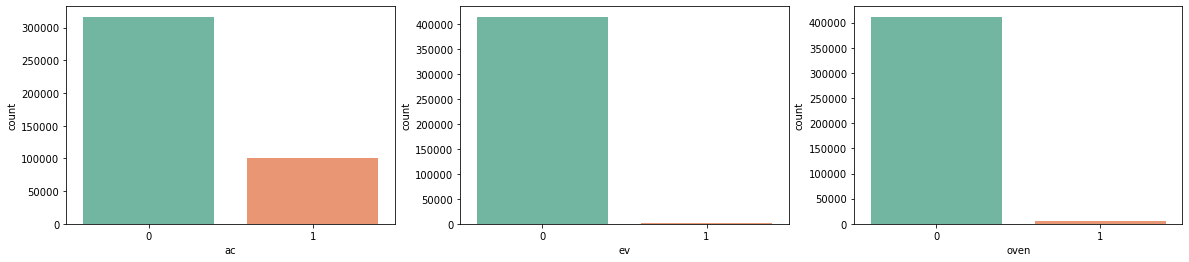

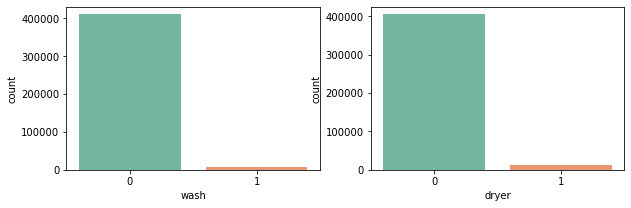

In [239]:
# Plot value count for each appliance
fig, axs = plt.subplots(ncols=3, figsize=(20, 4))
sns.countplot(x='ac', data=eda_df_train, palette='Set2', ax=axs[0])
sns.countplot(x='ev', data=eda_df_train, palette='Set2', ax=axs[1])
sns.countplot(x='oven', data=eda_df_train, palette='Set2', ax=axs[2])
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
sns.countplot(x='wash', data=eda_df_train, palette='Set2', ax=axs[0])
sns.countplot(x='dryer', data=eda_df_train, palette='Set2', ax=axs[1])

In [240]:
# Getting count for each appliance
counts_ac = eda_df_train['ac'].value_counts()
counts_ev = eda_df_train['ev'].value_counts()
counts_ov = eda_df_train['oven'].value_counts()
counts_wa = eda_df_train['wash'].value_counts()
counts_dr = eda_df_train['dryer'].value_counts()

print('Air Conditioner')
print('Total Sample with \'{}\' : {}'.format(counts_ac.index[0], counts_ac[0]))
print('Total Sample with \'{}\' : {}'.format(counts_ac.index[1], counts_ac[1]))
print('Electric Vehicle Charger')
print('Total Sample with \'{}\' : {}'.format(counts_ev.index[0], counts_ev[0]))
print('Total Sample with \'{}\' : {}'.format(counts_ev.index[1], counts_ev[1]))
print('Oven')
print('Total Sample with \'{}\' : {}'.format(counts_ov.index[0], counts_ov[0]))
print('Total Sample with \'{}\' : {}'.format(counts_ov.index[1], counts_ov[1]))
print('Wash Machine')
print('Total Sample with \'{}\' : {}'.format(counts_wa.index[0], counts_wa[0]))
print('Total Sample with \'{}\' : {}'.format(counts_wa.index[1], counts_wa[1]))
print('Dryer Machine')
print('Total Sample with \'{}\' : {}'.format(counts_dr.index[0], counts_dr[0]))
print('Total Sample with \'{}\' : {}'.format(counts_dr.index[1], counts_dr[1]))

Air Conditioner
Total Sample with '0' : 316521
Total Sample with '1' : 101199
Electric Vehicle Charger
Total Sample with '0' : 415385
Total Sample with '1' : 2335
Oven
Total Sample with '0' : 411764
Total Sample with '1' : 5956
Wash Machine
Total Sample with '0' : 409767
Total Sample with '1' : 7953
Dryer Machine
Total Sample with '0' : 404144
Total Sample with '1' : 13576


<AxesSubplot:xlabel='hourofday', ylabel='count'>

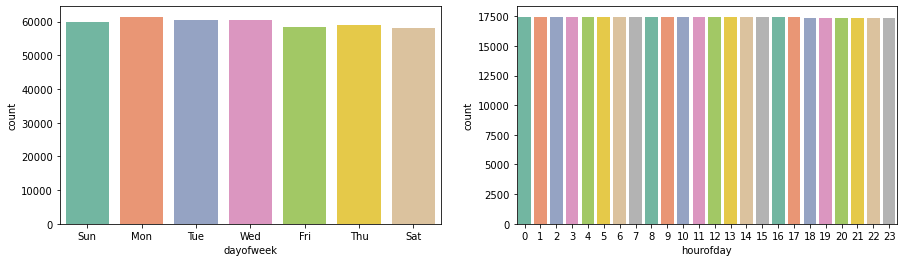

In [241]:
# PLot value count for dayofweek and hourofday
fig, axs = plt.subplots(ncols=2, figsize=(15, 4))
sns.countplot(x='dayofweek', data=eda_df_train, palette='Set2', ax=axs[0])
sns.countplot(x='hourofday', data=eda_df_train, palette='Set2', ax=axs[1])

From the above graphs we can see that the class variables do not have a proper distribution of the values especially in the case of `ac,ev, oven, wash and dryer`. This demonstrates that there is a class imbalance problem in the dataset and has to be solved using downsampling or upsampling techniques. It will be dicussed in the **Resampling section**.

The problem with the imbalanced class dataset is that whatever models we build will be `biased` and `skewed` towards the `majority class`. In our case the majority class is 0 which means most of the appliances remain switched off, so when the models are applied, the classification accuracy might be very high but the f1 score will be very less.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'load'),
  Text(2, 0, 'hourofday'),
  Text(3, 0, 'dif'),
  Text(4, 0, 'absdif'),
  Text(5, 0, 'max'),
  Text(6, 0, 'var'),
  Text(7, 0, 'entropy'),
  Text(8, 0, 'nonlinear'),
  Text(9, 0, 'hurst')])

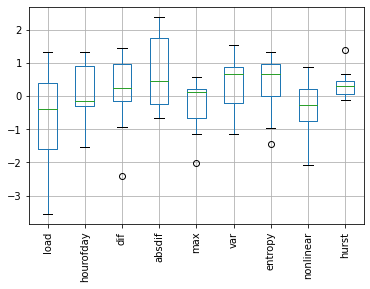

In [242]:
# Add vertical labeling
np.random.seed(1234)
eda_df_train = pd.DataFrame(np.random.randn(10, 9),
                  columns=['load', 'hourofday', 'dif', 'absdif','max','var','entropy','nonlinear','hurst'])
boxplot = eda_df_train.boxplot(column=['load', 'hourofday', 'dif', 'absdif','max','var','entropy','nonlinear','hurst'])
plt.xticks(rotation=90)

C:\Users\Henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

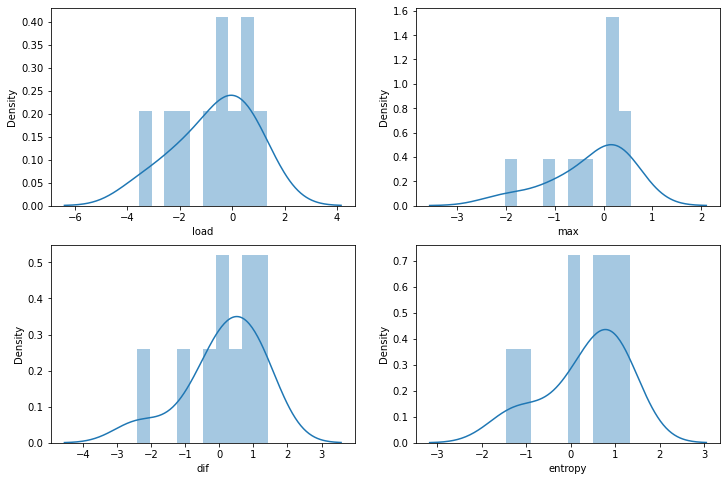

In [243]:
# Density plots of load, max and difference
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(eda_df_train["load"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(eda_df_train["max"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(eda_df_train["dif"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(eda_df_train["entropy"],bins=10, ax=ax[1][1])
# vis5 = sns.distplot(eda_df_train["absdif"],bins=10)
# vis6 = sns.distplot(eda_df_train["hourofday"],bins=10)

Text(0.5, 1.0, 'Variation of load over the week')

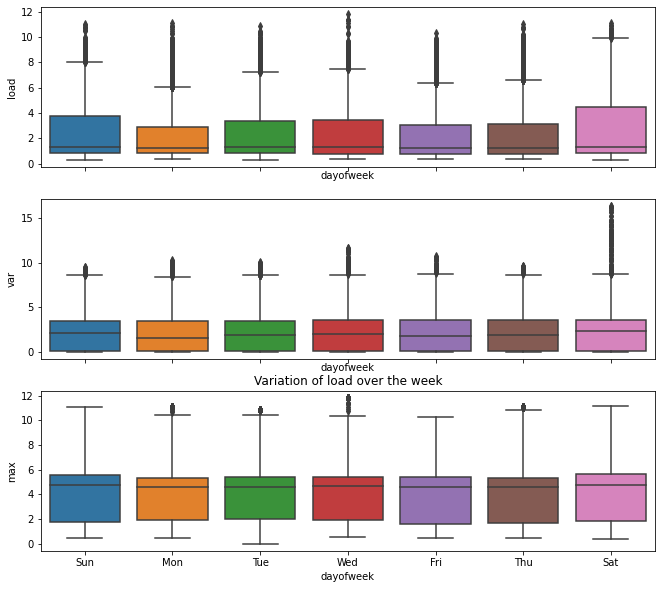

In [245]:
# Variation of load, max, and variance over the week
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['load', 'var', 'max'], axes):
    sns.boxplot(data=df_train, x='dayofweek', y=name, ax=ax)
    ax.set_ylabel(name)
ax.set_title("Variation of load over the week")

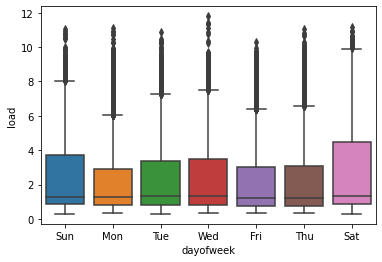

In [246]:
# Load variation
sns.boxplot(data=df_train, x='dayofweek', y='load');

##### Density Plots:
1. From the density plots we can see that load, max, entropy and absdif are skewed to the right. 
2. The maximum amount of values seem to occur between 0 and 1 and mostly over 1. 
3. These graphs also have a long tail describing that the devices were not frequently used but few of the appliances such as `ac` when swithced on takes more load then the other devices.

##### Boxplots:
1. A boxplot was plotted between the load and the day of the week to understand the variation of load over the 7 days of the week. 
2. It can be seen from these plots that the appliances were used more on the weekends rather than on weekdays.
3. Appliances were used more on Wednessday during the week and have high frequency over the weekend suggesting that weekend entails the residents being at home and using the appliances as compared to the weekday. 
4. The maximum load for each appliance is more or less the same, `ac` has slightly more maxmium load capacity then the others. 
5. The variance is the same over the week.
6. The median Q2 of the load remains same at around 2 while the Q3 for weekends rises to 4 and remains less on weekends.

### 2.2. Bivariate Analysis
The Bivariate Analysis will be conducted for each appliance independently. The below section aims to understand the `trends` and the `seasonality` for the time series data. It aims to study the pattern of usage for the applaince.

#### 2.2.1. AC Analysis

In [248]:
# Create dataframe dropping other appliances
df_ac = df_train.drop(['ev', 'oven', 'wash', 'dryer'], axis=1)
print(df_ac.shape)
df_ac.head()

(417720, 11)


,load,ac,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


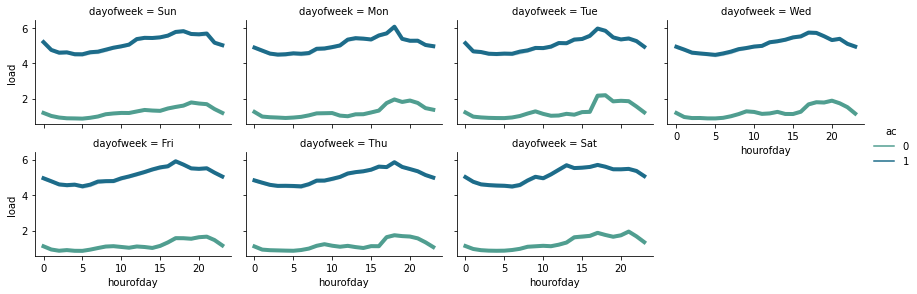

In [249]:
# Plot each device time series in its own facet
g = sns.relplot(
    data=df_ac,
    x="hourofday", y="load", col="dayofweek", hue="ac",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=2, aspect=1.5, legend=True,
)

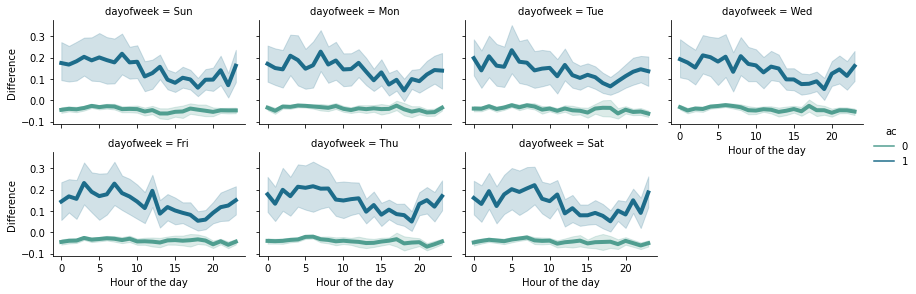

In [250]:
# Plot each device time series in its own facet
g = sns.relplot(
    data=df_ac,
    x="hourofday", y="dif", col="dayofweek", hue="ac",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=2, aspect=1.5, legend=True,
    
)
g.set(xlabel="Hour of the day", ylabel = "Difference")

From th previous plot we got:
1. For `AC` appliance we can see that most part of it was switched on after 3pm and the maximum amount of the appliance was used after 5 pm. 
2. The appliance was used more over the weekend as there are more spikes on Saturday and SUnday
3. From the dif vs hourofday graph, more positive spikes were towards the end of the day leading to depict that the appliance was used more frequently towards the end of the day. 
4. For weekends, the `ac` was used before 10 am which might reveal that the residents were at home and used the appliance betfore afternoon itself.

#### 2.2.2. EV Analysis

In [251]:
# Create dataframe dropping other appliances
df_ev = df_train.drop(['ac', 'oven', 'wash', 'dryer'], axis=1)
print(df_ac.shape)
df_ev.head()

(417720, 11)


,load,ev,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


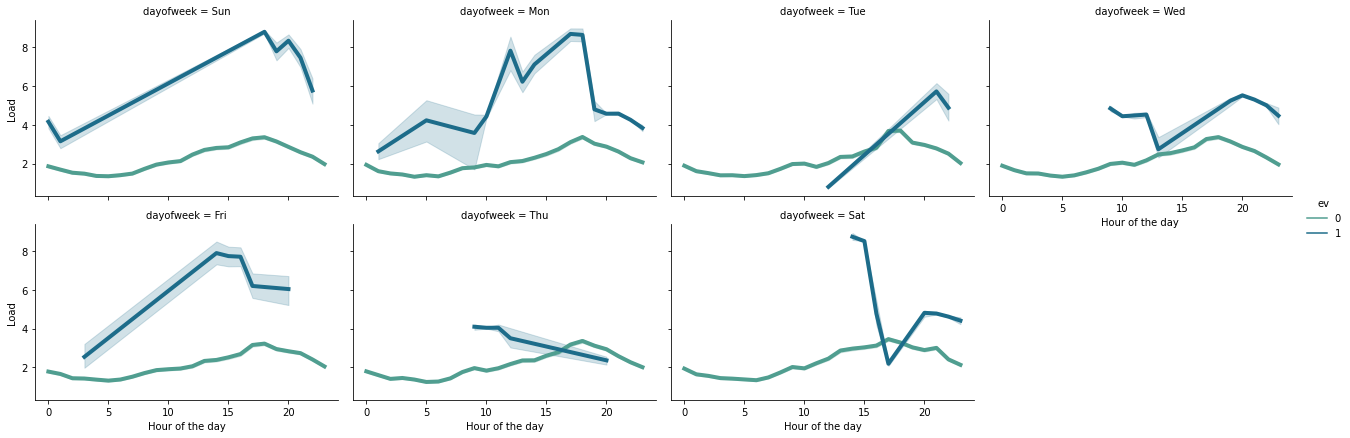

In [252]:
# Plot each device time series in its own facet
g = sns.relplot(
    data=df_ev,
    x="hourofday", y="load", col="dayofweek", hue="ev",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Load")

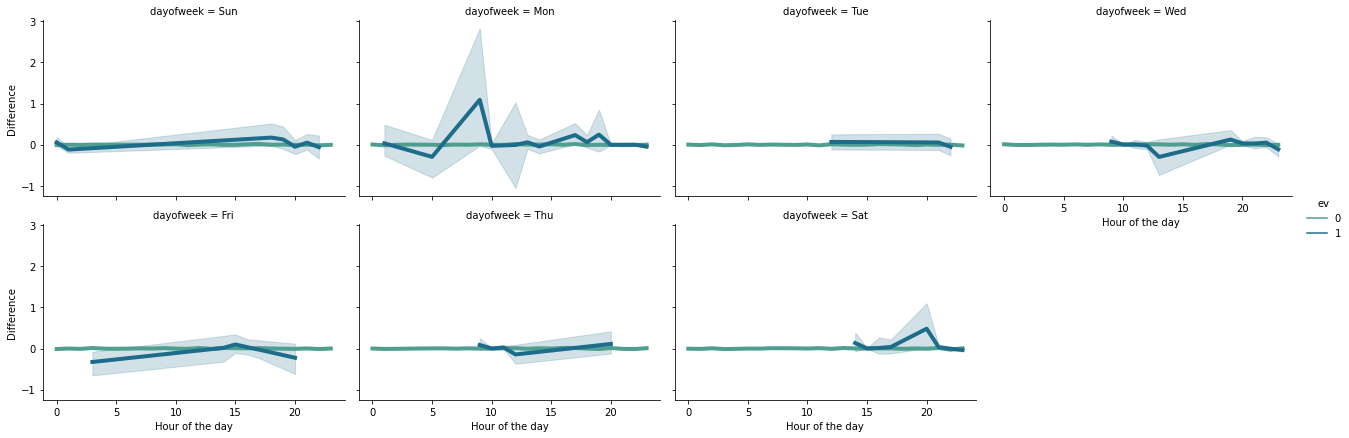

In [253]:
# Plot each device time series in its own facet
g = sns.relplot(
    data=df_ev,
    x="hourofday", y="dif", col="dayofweek", hue="ev",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Difference")

From the previous plots we got:
1. The `EV` appliance particularly was not used as frequently as the other devices, as there are fewer spikes. 
2. Although the spike peaks on the Monday morning and continues to gradually spike during thr whole day. 
3. Again it was used on Saturday and Sunday. 
4. On Monday it was used at midnight to early morning before 10 am and consecutively after 3 pm before 8 pm revealing that it might be required for travel purposes.

#### 2.2.3. Oven Analysis

In [254]:
# Create dataframe dropping other appliances
df_oven = df_train.drop(['ac', 'ev', 'wash', 'dryer'], axis=1)
print(df_oven.shape)
df_oven.head()

(417720, 11)


,load,oven,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


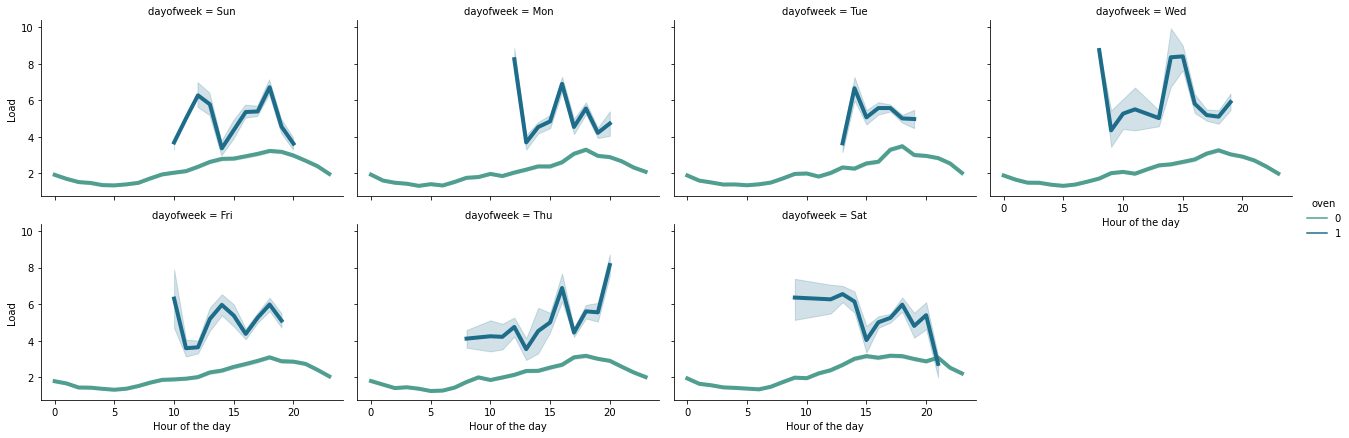

In [255]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_oven,
    x="hourofday", y="load", col="dayofweek",hue="oven",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Load")

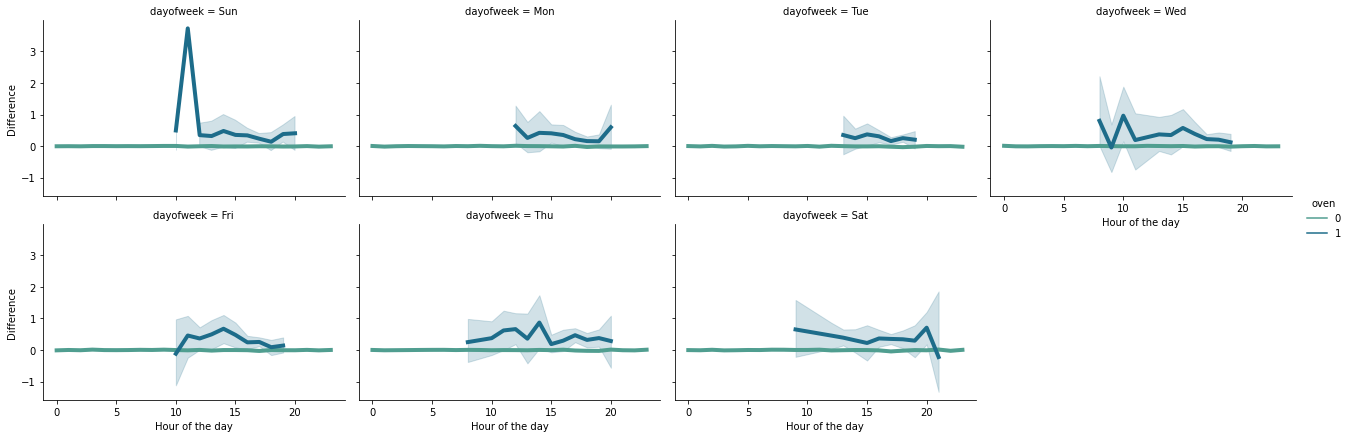

In [256]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_oven,
    x="hourofday", y="dif", col="dayofweek",hue="oven",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Difference")

From the previous plots we got:
1. The above graph reveals that the `oven` was more frequently used during the lunch and dinner time of the day. 
2. The spikes were seen on weekends stating that the residents were at home so the used to cook more often on weekends than weekdays. 
3. During the weekdays the oven was used at 10 am and again at 3 pm and then laslty at night. 
4. All these appliances were also used on Wednessday during the day stating that the residents might be at home on Wednessday.

#### 2.2.4. Wash Analysis

In [257]:
# Create dataframe dropping other appliances
df_wash = df_train.drop(['ac', 'ev', 'oven', 'dryer'], axis=1)
print(df_wash.shape)
df_wash.head()

(417720, 11)


,load,wash,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


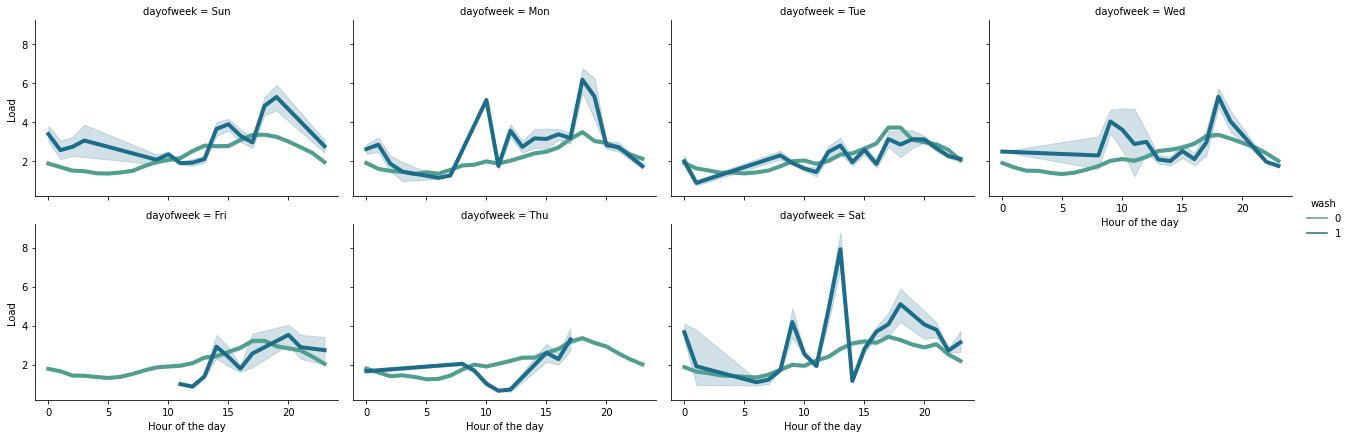

In [258]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_wash,
    x="hourofday", y="load", col="dayofweek",hue="wash",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Load")

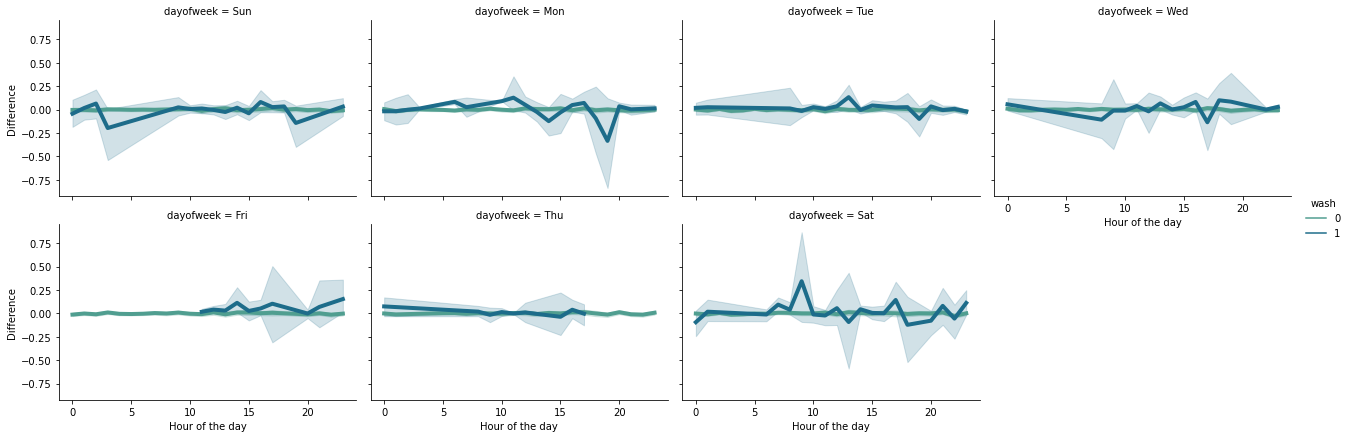

In [259]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_wash,
    x="hourofday", y="dif", col="dayofweek",hue="wash",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5, legend=True,
)
g.set(xlabel="Hour of the day", ylabel = "Difference")

From the previous plots we got:
1. The plot of the `wash` follows a negative trend as it was not used very frequently. 
2. It was only used during Saturday wthere the spikes plummet to a value of 0.25. 
3. it also reveals that the appliance was only used between 5 am and 10 pm mostly around at 8 and 9 am for about 2 hours. 
4. These trend plots also reveal the estimated time of usage of the appliances.

#### 2.2.5. Dryer Analysis

In [260]:
# Create dataframe dropping other appliances
df_dryer = df_train.drop(['ac', 'ev', 'oven', 'wash'], axis=1)
print(df_dryer.shape)
df_dryer.head()

(417720, 11)


,load,dryer,hourofday,dayofweek,dif,absdif,max,var,entropy,nonlinear,hurst
0,2.245,0,0,Sun,0.987,0.987,6.215,3.074549,0.678886,0.052903,0.994071
1,2.259,0,0,Sun,0.014,0.014,6.215,3.172867,0.667450,0.054829,0.994154
2,2.269,0,0,Sun,0.010,0.010,6.215,3.270112,0.647777,0.056991,0.994220
3,2.268,0,0,Sun,-0.001,0.001,6.215,3.303763,0.629227,0.057606,0.994150
4,2.270,0,0,Sun,0.002,0.002,6.215,3.302744,0.621295,0.082640,0.994041


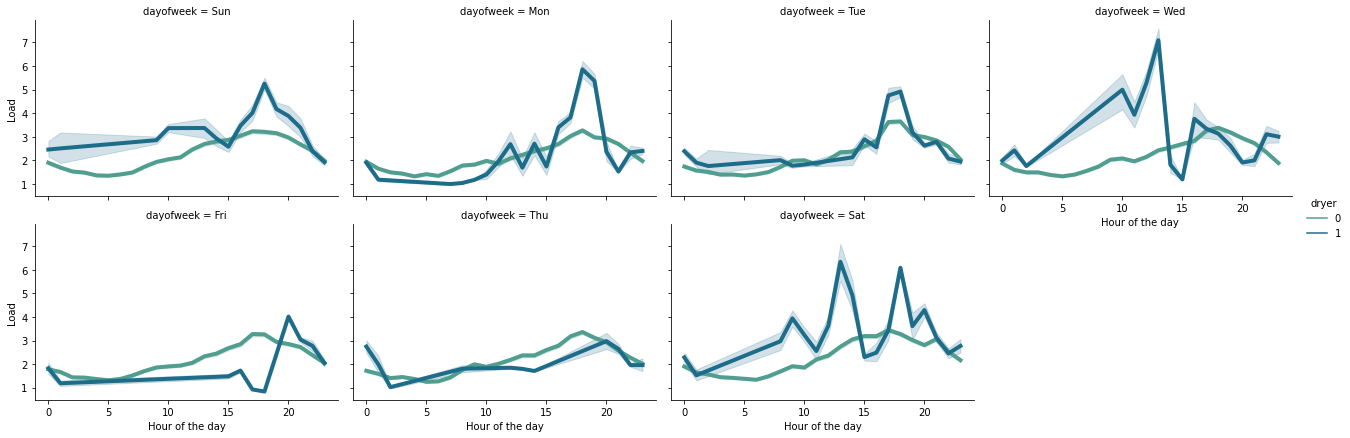

In [261]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_dryer,
    x="hourofday", y="load", col="dayofweek",hue="dryer",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5,  legend="brief",
)
g.set(xlabel="Hour of the day", ylabel = "Load")

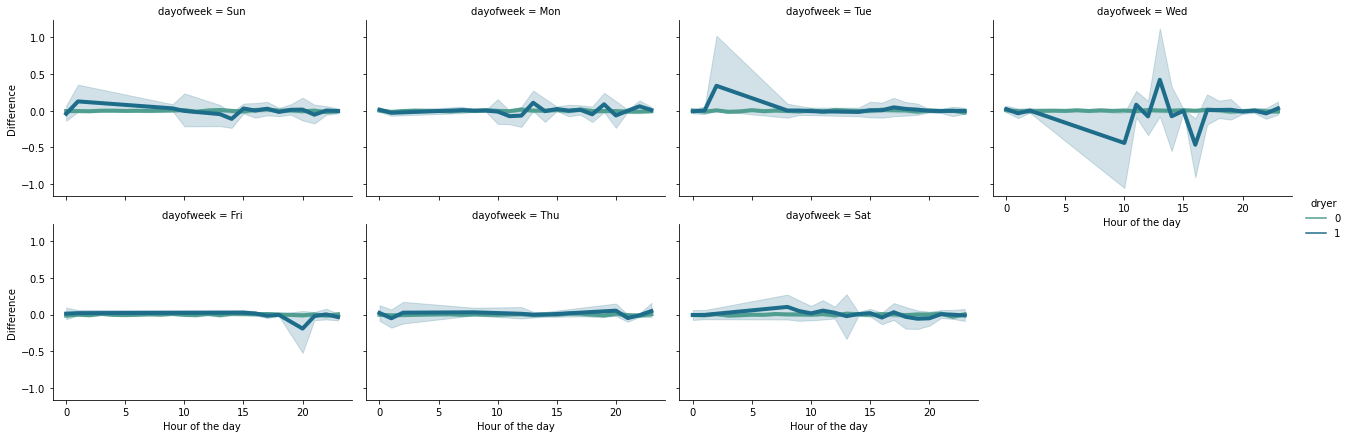

In [262]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_dryer,
    x="hourofday", y="dif", col="dayofweek",hue="dryer",
    kind="line", palette="crest", linewidth=4,
    col_wrap=4, height=3, aspect=1.5,  legend="brief",
)
g.set(xlabel="Hour of the day", ylabel = "Difference")

From the previous plots we got:
1. The `Dryer` has large amount of uncertainity and the plots are not too clear for more insight generation. 
2. However, the are positive spikes during the weekdays more on Tuesday and Wednessday. It might state that the dryer was used between 10 am and 3 pm more frequently as compared to other days.

### 2.3. Multivariate Analysis
Checking the correlation plot of all variables with respect to the class variables

In [263]:
cor=df_train.corr()
cor

,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst
load,1.000000,0.908138,0.132611,0.198626,0.038060,0.055399,0.266770,0.140416,0.191160,0.589362,0.462183,-0.045828,-0.113488,0.024420
ac,0.908138,1.000000,-0.002375,0.036529,0.001360,0.005924,0.151364,0.135890,0.191702,0.518319,0.493826,-0.164815,-0.100162,0.117848
ev,0.132611,-0.002375,1.000000,-0.007392,-0.010445,-0.000161,0.053139,0.002615,0.002921,0.101176,0.012398,0.003004,0.015644,-0.015511
oven,0.198626,0.036529,-0.007392,1.000000,0.010728,0.016675,0.085837,0.067147,0.188437,0.185083,0.095903,0.112254,-0.031538,-0.054968
wash,0.038060,0.001360,-0.010445,0.010728,1.000000,0.065053,0.044965,0.005053,0.011816,0.027232,-0.006346,0.028599,-0.022148,-0.001121
dryer,0.055399,0.005924,-0.000161,0.016675,0.065053,1.000000,0.070596,0.000834,0.009839,0.042265,-0.005888,0.028004,-0.027731,-0.024604
hourofday,0.266770,0.151364,0.053139,0.085837,0.044965,0.070596,1.000000,0.000804,0.062109,0.243539,0.125806,0.108226,-0.090149,-0.090406
dif,0.140416,0.135890,0.002615,0.067147,0.005053,0.000834,0.000804,1.000000,0.158961,0.000291,0.000245,-0.000316,0.003157,0.000796
absdif,0.191160,0.191702,0.002921,0.188437,0.011816,0.009839,0.062109,0.158961,1.000000,0.219058,0.187246,0.040619,-0.061003,-0.000666
max,0.589362,0.518319,0.101176,0.185083,0.027232,0.042265,0.243539,0.000291,0.219058,1.000000,0.849075,-0.167181,-0.148559,0.128823


<AxesSubplot:>

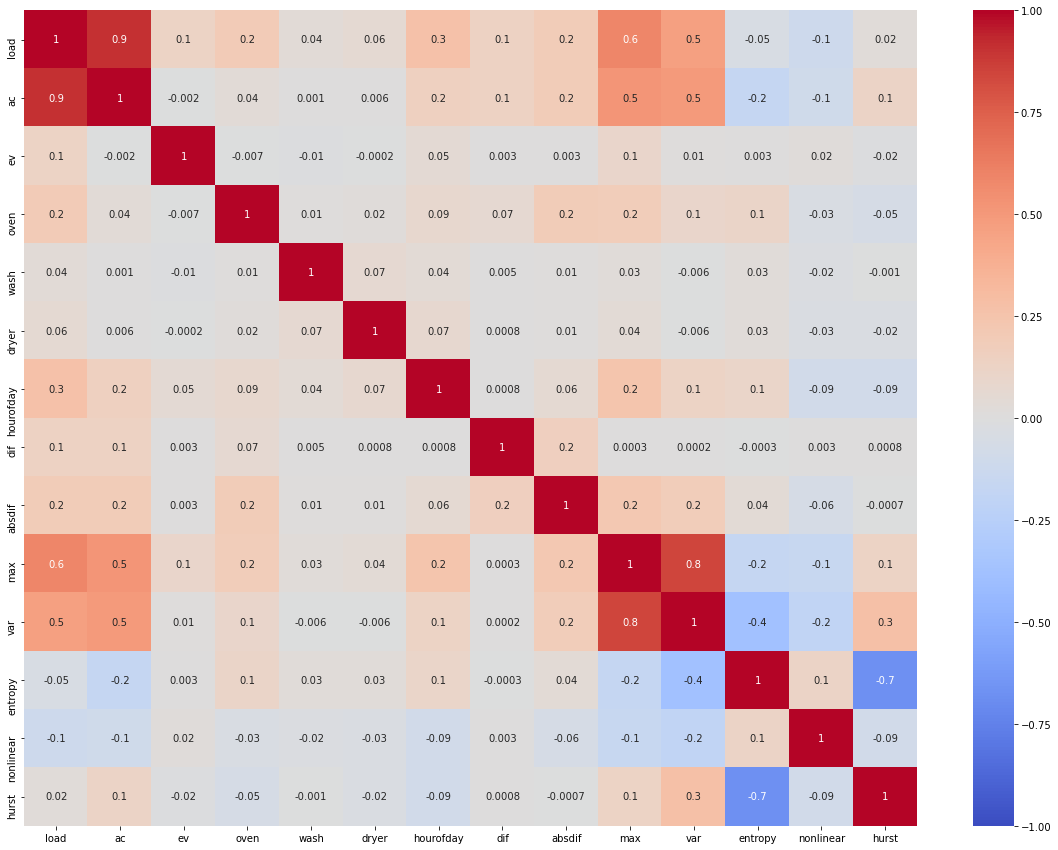

In [264]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_train.corr(), annot = True, vmin=-1, vmax=1, center= 0,fmt='.1g', cmap= 'coolwarm')

In [265]:
from scipy import stats

print(stats.pointbiserialr(df_train['load'], df_train['ac']))
print(stats.pointbiserialr(df_train['load'], df_train['ev']))
print(stats.pointbiserialr(df_train['load'], df_train['oven']))
print(stats.pointbiserialr(df_train['load'], df_train['wash']))
print(stats.pointbiserialr(df_train['load'], df_train['dryer']))

PointbiserialrResult(correlation=0.9081381885099088, pvalue=0.0)
PointbiserialrResult(correlation=0.13261141765373285, pvalue=0.0)
PointbiserialrResult(correlation=0.1986259647504433, pvalue=0.0)
PointbiserialrResult(correlation=0.03805981834976408, pvalue=1.0530642982395652e-133)
PointbiserialrResult(correlation=0.055399124897741785, pvalue=3.4372170407455706e-281)


**Since we are dealing with categorical values which are dichotomous. According to statistics we dont calculate much of correlation between a continous variable such as load, max, dif, absdif, and a categorical variable such as ac, ev, oven.**

1. Therefore pointbiserial correlation was calculated between a continoues and a categorical variable. 
2. The maximum correlation lies between load and ac with `0.908` which suggests a strong correlation. 
3. The correlation between load and other class variables also state that since the values are less, the devices were swictched off most of the time.
4. This results in the imbalanced class problem leading to skewed results. 
5. All the appliances have less correlation with the hourofday so the appliances were not swithced on frequently.
6. Oven has only correlation value of 0.19 with load as compared to other.
7. From the correlation plot we can also derive the most used appliances which are according to the order given below:
    - AC
    - Wash
    - Oven
    - EV
    - Dryer

### 2.4. Handling Categorical Variables

In [268]:
# Encoding the datafram for dummy variable creation for the categorical variables
df_train_encode = pd.get_dummies(df_train, columns=['dayofweek'])
df_train_encode.head()

,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,...,entropy,nonlinear,hurst,dayofweek_Fri,dayofweek_Mon,dayofweek_Sat,dayofweek_Sun,dayofweek_Thu,dayofweek_Tue,dayofweek_Wed
0,2.245,0,0,0,0,0,0,0.987,0.987,6.215,...,0.678886,0.052903,0.994071,0,0,0,1,0,0,0
1,2.259,0,0,0,0,0,0,0.014,0.014,6.215,...,0.667450,0.054829,0.994154,0,0,0,1,0,0,0
2,2.269,0,0,0,0,0,0,0.010,0.010,6.215,...,0.647777,0.056991,0.994220,0,0,0,1,0,0,0
3,2.268,0,0,0,0,0,0,-0.001,0.001,6.215,...,0.629227,0.057606,0.994150,0,0,0,1,0,0,0
4,2.270,0,0,0,0,0,0,0.002,0.002,6.215,...,0.621295,0.082640,0.994041,0,0,0,1,0,0,0


In [269]:
df_test_encode = pd.get_dummies(df_test, columns=['dayofweek'])
df_test_encode.head()

,load,hourofday,dif,absdif,max,var,entropy,nonlinear,hurst,dayofweek_Fri,dayofweek_Mon,dayofweek_Sat,dayofweek_Sun,dayofweek_Thu,dayofweek_Tue,dayofweek_Wed
0,1.869,0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
1,1.673,0,-0.196,0.196,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1.660,0,-0.013,0.013,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
3,1.772,0,0.112,0.112,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
4,1.679,0,-0.093,0.093,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0


In [270]:
print(df_train_encode.shape)
print(df_test_encode.shape)

(417720, 21)
(105540, 16)


##### Insights:
1. Load has maximum correlation with AC resulting in a value of 0.9 
2. Oven has only correlation value of 0.19 with load as compared to other.

From the previous analysis, 'dif' gives us a hint when 'ac' is turned on and off. Apparently, after reaching K value of 'dif' that means 'ac' has turned on, and after decreases the same K value, the 'ac' has turned off. Let's build our model just using 'dif' and 'load' as our features.

## 3. Resampling - Random Under(Down) Sampling and Over(Up)Sampling
### 3.1. UpSampling and DownSampling
When working with unbalanced dataset, the idea is t turn it into a balanced dataset by deciding to use two possible approaches:  `UpSampling` or `DownSampling`. When applying `Upsamplig`, the class with more records is taken as reference and the one which has less than that is completed by repeating the sampling process. For `DownSampling`, the class with less records is taken as reference and the one which has more than that is sampled the same number of records thant the first one.

In [50]:
# Create balance dataframe by sampling randomly unbalance dataframe
def get_balance_df(df_in, column, get_max=True, debugging=False):
    
    # just for debugging
    if not debugging:
        counts = df_in[column].value_counts()
        counts_list = [counts[0], counts[1]]

    else:
        counts_list = [1, 2]

    # oversampling, get same nrows of highest (replace=True for the lowest)
    if get_max:
        max_val = counts_list.index(max(counts_list))
        df_1 = df_in[df_in[column]==max_val].sample(n=max(counts_list), random_state=1234, replace=False)
        df_2 = df_in[df_in[column]!=max_val].sample(n=max(counts_list), random_state=1234, replace=True)

    # undersampling, get same nrows of lowest
    else:
        min_val = counts_list.index(min(counts_list))
        df_1 = df_in[df_in[column]==min_val].sample(n=min(counts_list), random_state=1234, replace=False)
        df_2 = df_in[df_in[column]!=min_val].sample(n=min(counts_list), random_state=1234, replace=False)

    df_out = df_1.append(df_2, ignore_index=True)
    
    return df_out

In [54]:
# Testing UpSampling
counts_ori = df_train_encode['ac'].value_counts()
print('Original Data Frame (Unbalance)')
print('Total Samples with \'{}\' : {}'.format(counts_ori.index[0], counts_ori[0]))
print('Total Samples with \'{}\' : {}'.format(counts_ori.index[1], counts_ori[1]))

df_up = get_balance_df(df_train_encode, 'ac', get_max=True, debugging=False)
counts_up = df_up['ac'].value_counts()
print('\nNew Data Frame (Balance) using UpSampling')
print('Total Samples with \'{}\' : {}'.format(counts_up.index[0], counts_up[0]))
print('Total Samples with \'{}\' : {}'.format(counts_up.index[1], counts_up[1]))
df_up.head()

Original Data Frame (Unbalance)
Total Samples with '0' : 316521
Total Samples with '1' : 101199

New Data Frame (Balance) using UpSampling
Total Samples with '0' : 316521
Total Samples with '1' : 316521


,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,...,entropy,nonlinear,hurst,dayofweek_Fri,dayofweek_Mon,dayofweek_Sat,dayofweek_Sun,dayofweek_Thu,dayofweek_Tue,dayofweek_Wed
0,0.947,0,0,0,0,0,10,-0.001,0.001,6.395,...,0.599314,3.557665,0.995394,0,0,0,0,0,1,0
1,0.875,0,0,0,0,0,10,-0.030,0.030,1.775,...,0.999149,0.468195,0.500046,0,0,1,0,0,0,0
2,0.668,0,0,0,0,0,10,0.004,0.004,0.770,...,0.724098,0.490236,0.990136,0,0,0,0,1,0,0
3,0.925,0,0,0,0,0,9,-0.017,0.017,5.713,...,0.675291,1.318992,0.991340,0,0,0,1,0,0,0
4,1.632,0,0,0,0,0,15,-0.050,0.050,2.171,...,0.919092,0.723635,0.500046,0,0,0,0,0,1,0


In [55]:
# Testing DownSampling
counts_ori = df_train_encode['ac'].value_counts()
print('Original Data Frame (Unbalance)')
print('Total Samples with \'{}\' : {}'.format(counts_ori.index[0], counts_ori[0]))
print('Total Samples with \'{}\' : {}'.format(counts_ori.index[1], counts_ori[1]))

df_down = get_balance_df(df_train_encode, 'ac', get_max=False, debugging=False)
counts_down = df_down['ac'].value_counts()
print('\nNew Data Frame (Balance) using DownSampling')
print('Total Samples with \'{}\' : {}'.format(counts_down.index[0], counts_down[0]))
print('Total Samples with \'{}\' : {}'.format(counts_down.index[1], counts_down[1]))
df_down.head()

Original Data Frame (Unbalance)
Total Samples with '0' : 316521
Total Samples with '1' : 101199

New Data Frame (Balance) using DownSampling
Total Samples with '0' : 101199
Total Samples with '1' : 101199


,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,...,entropy,nonlinear,hurst,dayofweek_Fri,dayofweek_Mon,dayofweek_Sat,dayofweek_Sun,dayofweek_Thu,dayofweek_Tue,dayofweek_Wed
0,5.405,1,0,0,0,0,13,0.011,0.011,5.444,...,0.668674,1.103972,0.992251,0,0,0,0,1,0,0
1,5.179,1,0,0,0,0,16,-0.045,0.045,5.995,...,0.720324,0.507281,0.990805,1,0,0,0,0,0,0
2,1.559,1,0,0,0,0,13,0.695,0.695,6.533,...,0.666628,0.101757,0.993198,0,0,0,0,1,0,0
3,5.581,1,0,0,0,0,16,-0.016,0.016,5.625,...,0.661393,0.514081,0.989982,0,0,0,0,0,1,0
4,5.000,1,0,0,0,0,21,4.181,4.181,5.052,...,0.732896,0.593550,0.988056,0,0,0,0,0,1,0


Applying the previous function before training the models will feed them with a balance dataframe regardless of the appliance we will be working on. By setting `True or False` the parameter `get_max`, the Upsamplig or DownSampling will be perform.

## 4. Feature Engineering
### 4.1. Feature Extraction (Tsfresh)
We will use *Tsfresh* package for extracting features from `load`. First of all, we need to understand how *Tsfresh* works and what kind of data this algorith uses.

Our algorith will be:
- Rolling time series (*https://tsfresh.readthedocs.io/en/latest/text/forecasting.html*)
- Extract Features (*https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html*)
- Select Relevant Features (*https://tsfresh.readthedocs.io/en/latest/text/feature_filtering.html*)

Having in mind this quick guide *https://tsfresh.readthedocs.io/en/latest/text/quick_start.html* we can modify our data in order to have the same structure. Firstly we will perform the feature extraction only using `ac` appliance. We will enconde `ac` as *id=1*. We also need *time* but our dataframe has two `dayofweek` and `hourofday`. Since these two features are mandatory to use, we will create our own `time` data which will be just and index beacuse in this scenario `time` is only used for showing and order. Let's see how our data frame looks like.

In [56]:
# Modiying our dataframe as defined above.
df_ac_full = df_ac.copy()  # make a copy just in case
df_ac_full['id'] = 1  # create id for ac
df_ac_full['time'] = df_ac_full.index  # create time as index

df_ac_feat = df_ac_full.loc[:,['id', 'time','load', 'ac']]  # reorganize features just for easy reading
print(df_ac_feat.shape)
df_ac_feat.head()

(417720, 4)


,id,time,load,ac
0,1,0,2.245,0
1,1,1,2.259,0
2,1,2,2.269,0
3,1,3,2.268,0
4,1,4,2.270,0


Since our original data is large (417720 records), just for testing let's use only the first 100 records. After confirming our algorithm works well, we will use the whole dataframe.

In [62]:
# Only first 100 rows will be used
df_ac_feat_small = df_ac_feat.loc[:100,].copy()
df_ac_feat_small

,id,time,load,ac
0,1,0,2.245,0
1,1,1,2.259,0
2,1,2,2.269,0
3,1,3,2.268,0
4,1,4,2.270,0
...,...,...,...,...
96,1,96,0.970,0
97,1,97,0.969,0
98,1,98,0.971,0
99,1,99,0.968,0


It looks good. Now let's understand our approach.
1. Rolling timem series: 
We have been given this hint: *Since appliance usage may last for a while (e.g., a few or several minutes), you may consider a neighborhood time window around each load data point. You can treat the window size as a hyper-parameter to tune and find the optimal size to extract features.* Becuase of this, we have to roll our time series in a way that gives us chunks of data of size equal to *window_size*. Here there is challenge. Our `ac` label has two possible values *0* or *1* but in a chunck may be more than *1* present so a possible solution could be considering a `1` if there is 1 or more `1` present in that chunk, and `0` otherwise. Here we have to reorganize our dataframe again accordignly with the *tsfresh example*. and preparing it for the next step. Basically, we need to separate features from label and reset indexes.
2. Feature Extraction:
Having this chuncks of data, the next step is to extract features from them. We will use *ComprehensiveFCParameters* as our extraction setting. In this link there is more info we can use.(*https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html*)
3. Feature Selection:
In this final step, we use features previously extracted and the labels. Both dataframes have to match in length and indexes, that is why we have preapared our dataframe in the previous steps. Finally we will reset indexes again.

In [63]:
# Useful Packages
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [64]:
# Function for rolling, extracting and selecting features.
def feature_extractor(df_in, window_size, label):
    '''Function that perform three steps for extracting the most relevant features from a time series.
    Step 1 - Roling Time series: roll time series based on window time.
    Step 2 - Extracting Features: extract features from rolled time series (out from previous step)
    Step 3 - Selecting Relevant Features: select the most relevant features based on label.'''
    
    # Roll time series (Step 1)
    X_rolled = roll_time_series(df_in, 
                                column_id="id", 
                                column_sort="time", 
                                max_timeshift=window_size, 
                                min_timeshift=0)
    
    X_rolled_new = X_rolled.drop(label, axis=1)   # drop label, we separate features from target
    y_rolled = X_rolled.set_index('id')  # set new index (orginal index was integer. we need a tuple)
    y_rolled_group = y_rolled.groupby(['id']).sum()  # get if appliance is on or off
    y_rolled_group[y_rolled_group >= 1] = 1  # more than one on means on
    y_rolled_group = y_rolled_group.loc[:, label]  # get label grouped by window

    # Extract all features (Step 2)
    extraction_settings = ComprehensiveFCParameters()
    X_extracted = extract_features(X_rolled_new, 
                                   column_id="id", 
                                   column_sort="time", 
                                   default_fc_parameters=extraction_settings, 
                                   impute_function=impute)
    
    # Select only relevant feature (Step 3)
    X_selected = select_features(X_extracted, y_rolled_group)
    
    # Prepare selected features
    X_selected.reset_index(drop=True, inplace=True)  # reset index to filter features
    X_filtered = X_extracted[X_selected.columns]  # filter features based on the selected ones
    X_filtered.reset_index(drop=True, inplace=True)  # again reset index for filtered features
    X_extracted.reset_index(drop=True, inplace=True)  # again reset index for extracted features
    y_rolled_group.reset_index(drop=True, inplace=True)  # again reset index for grouped labels

    return (X_extracted, X_filtered, y_rolled_group)

Now we are ready to test our function and see if it works as expected.

In [67]:
# Define datframe just for testing purposes.
df_tsfresh = df_ac_feat_small.copy()

# Function will return three dataframes. 
# Features extracted from rolled time series
# Features selected from the features extracted previously
# labels from the rolling process. 
X_extracted_test, X_selected_test, y_test = feature_extractor(df_in=df_tsfresh, window_size=5, label='ac')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 17/17 [00:05<00:00,  2.84it/s]


In [68]:
# Have a look at the Features extracted from rolled time series
print(X_extracted_test.shape)
X_extracted_test.head()

(101, 787)


,load__variance_larger_than_standard_deviation,load__has_duplicate_max,load__has_duplicate_min,load__has_duplicate,load__sum_values,load__abs_energy,load__mean_abs_change,load__mean_change,load__mean_second_derivative_central,load__median,...,load__permutation_entropy__dimension_5__tau_1,load__permutation_entropy__dimension_6__tau_1,load__permutation_entropy__dimension_7__tau_1,load__query_similarity_count__query_None__threshold_0.0,"load__matrix_profile__feature_""min""__threshold_0.98","load__matrix_profile__feature_""max""__threshold_0.98","load__matrix_profile__feature_""mean""__threshold_0.98","load__matrix_profile__feature_""median""__threshold_0.98","load__matrix_profile__feature_""25""__threshold_0.98","load__matrix_profile__feature_""75""__threshold_0.98"
0,0.0,0.0,0.0,0.0,2.245,5.040025,0.015600,-0.001600,-0.00025,2.2450,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,4.504,10.143106,0.014000,0.014000,-0.00025,2.2520,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,6.773,15.291467,0.012000,0.012000,-0.00200,2.2590,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,9.041,20.435291,0.008333,0.007667,-0.00375,2.2635,...,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,11.311,25.588191,0.006750,0.006250,-0.00200,2.2680,...,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are **787** features extracted from `load` with *window_size=5*.

In [69]:
# Have a look at the Features selected from the features extracted previously
print(X_selected_test.shape)
X_selected_test.head()

(101, 123)


,load__maximum,load__quantile__q_0.9,load__abs_energy,"load__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""max""",load__root_mean_square,load__sum_values,"load__fft_coefficient__attr_""real""__coeff_0","load__fft_coefficient__attr_""abs""__coeff_0",load__c3__lag_1,load__quantile__q_0.8,...,"load__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2","load__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","load__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.8","load__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","load__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0",load__symmetry_looking__r_0.15000000000000002,"load__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.6","load__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.4",load__number_cwt_peaks__n_5,load__autocorrelation__lag_1
0,2.245,2.2450,5.040025,2.3455,2.245000,2.245,2.245,2.245,0.000000,2.2450,...,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.317982
1,2.259,2.2576,10.143106,2.3455,2.252011,4.504,4.504,4.504,0.000000,2.2562,...,0.0,0.000,0.0,0.0,0.000,1.0,0.0,0.0,0.0,-1.000000
2,2.269,2.2670,15.291467,2.3455,2.257688,6.773,6.773,6.773,11.507131,2.2650,...,0.0,0.014,0.0,0.0,0.000,1.0,0.0,0.0,1.0,-0.009174
3,2.269,2.2687,20.435291,2.3455,2.260271,9.041,9.041,9.041,11.566077,2.2684,...,0.0,0.014,0.0,0.0,0.014,1.0,0.0,0.0,1.0,0.273095
4,2.270,2.2696,25.588191,2.3455,2.262220,11.311,11.311,11.311,11.604594,2.2692,...,0.0,0.014,0.0,0.0,0.014,0.0,0.0,0.0,2.0,0.330013


There are **123** features selected of **787** features extracted from `load` with *window_size=5*. Of course, we may decide to use only the most representative ones to buid our model. We can choose other feature selecting criteria.

In [70]:
# Have a look at the labels from the rolling process. 
y_test

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Name: ac, Length: 101, dtype: int64

Our label looks good too.

### 4.2. Feature Selection
#### 4.2.1. Univariate Selection
https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [71]:
# Useful packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [72]:
# Get Univariate Selection
def get_univariate_selection(df_in, target, top_k, times):
    '''Get Univariate Selection given a data frame and target to be analyzed.
    input: data_in: data frame, target: string, num_features: integer, top_k: integer, times: integer
    output: df_uni_sel: data frame sorted by importance'''

    X = df_in.drop(target, axis=1).values
    Y = df_in[target]

    model = SelectKBest(score_func=f_classif, k=top_k)
    model.fit(X, Y)
    
    df_uni_sel = pd.DataFrame(columns=['Feature','Importance'])

    for h in range(1,times):
        
        for i, column in enumerate(df_in.drop(target, axis=1)):
            new_row = {'Feature': column, 'Importance': model.scores_[i]}
            df_uni_sel = df_uni_sel.append(new_row, ignore_index=True)
    
    df_grouped = df_uni_sel.groupby('Feature')
    mean_df = df_grouped.mean()
    mean_df = mean_df.reset_index()
        
    return mean_df.sort_values(by=['Importance'], ascending=False).head(top_k)

In [78]:
# Univariate Selection for 'ac'
df_ac_feasel = df_train_encode.copy()
get_univariate_selection(df_ac_feasel, 'ac', 6, 5)

,Feature,Importance
14,load,1.965361e+06
15,max,1.534458e+05
18,var,1.347198e+05
0,absdif,1.593657e+04
10,entropy,1.166376e+04
12,hourofday,9.794752e+03


#### 4.2.1. Recursive Feature Elimination

In [79]:
# Useful Packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Get Feature Importance
def get_recursive_elimination(df_in, target, top_k, times):
    '''Get PCA given a data frame and target to be analyzed.
    input: data_in: data frame, target: string, top_k: integer, times: integer
    output: df_pca: data frame sorted by importance'''

    X = df_in.drop(target, axis=1).values
    Y = df_in[target]
    
#     rfe = RFE(logic, top_k)
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=top_k)
    rfe.fit(X, Y)
    
    df_recur_elim = pd.DataFrame(columns=['Feature','Importance'])

    for h in range(1,times):
        
        for i, column in enumerate(df_in.drop(target, axis=1)):
            new_row = {'Feature': column, 'Importance': rfe.ranking_[i]}
            df_recur_elim = df_recur_elim.append(new_row, ignore_index=True)
        
    df_recur_elim['Importance'] = pd.to_numeric(df_recur_elim['Importance'])
    df_grouped = df_recur_elim.groupby('Feature')
    mean_df = df_grouped.mean()
    mean_df = mean_df.reset_index()
        
    return mean_df.sort_values(by=['Importance'], ascending=True).head(top_k)

In [81]:
# Recursive Feature Elimination for 'ac'
get_recursive_elimination(df_ac_feasel, 'ac', 6, 5)

,Feature,Importance
0,absdif,1
14,load,1
13,hurst,1
11,ev,1
18,var,1
15,max,1


#### 4.2.3. PCA

In [82]:
# Useful Packages
from sklearn.decomposition import PCA

In [84]:
# Get Feature Importance PCA
def get_pca(df_in, target, top_k, times):
    '''Get PCA given a data frame and target to be analyzed.
    input: data_in: data frame, target: string, top_k: integer, times: integer
    output: df_pca: data frame sorted by importance'''

    X = df_in.drop(target, axis=1).values
    Y = df_in[target]

    model = PCA()
    model.fit(X, Y)
    
    df_pca = pd.DataFrame(columns=['Feature','Importance'])

    for h in range(1,times):
        
        for i, column in enumerate(df_in.drop(target, axis=1)):
            new_row = {'Feature': column, 'Importance': model.explained_variance_[i]}
            df_pca = df_pca.append(new_row, ignore_index=True)
        
    df_grouped = df_pca.groupby('Feature')
    mean_df = df_grouped.mean()
    mean_df = mean_df.reset_index()
        
    return mean_df.sort_values(by=['Importance'], ascending=False).head(top_k)

In [85]:
# PCA for 'ac'
get_pca(df_ac_feat_small, 'ac', 6, 5)

,Feature,Importance
0,id,858.607990
2,time,3.003796
1,load,0.000000


### 4.3. Feature Importance
- Input: Encode Data Frame (df_train_encode)
['load','hourofday','dif','absdif','max','var','entropy','nonlinear','hurst', 'dayofweek_Fri','dayofweek_Mon','dayofweek_Sat','dayofweek_Sun','dayofweek_Thu','dayofweek_Tue','dayofweek_Wed'],

In [87]:
# Data Fraime used to perform Feature Extraction
df_train_encode.head()

,load,ac,ev,oven,wash,dryer,hourofday,dif,absdif,max,...,entropy,nonlinear,hurst,dayofweek_Fri,dayofweek_Mon,dayofweek_Sat,dayofweek_Sun,dayofweek_Thu,dayofweek_Tue,dayofweek_Wed
0,2.245,0,0,0,0,0,0,0.987,0.987,6.215,...,0.678886,0.052903,0.994071,0,0,0,1,0,0,0
1,2.259,0,0,0,0,0,0,0.014,0.014,6.215,...,0.667450,0.054829,0.994154,0,0,0,1,0,0,0
2,2.269,0,0,0,0,0,0,0.010,0.010,6.215,...,0.647777,0.056991,0.994220,0,0,0,1,0,0,0
3,2.268,0,0,0,0,0,0,-0.001,0.001,6.215,...,0.629227,0.057606,0.994150,0,0,0,1,0,0,0
4,2.270,0,0,0,0,0,0,0.002,0.002,6.215,...,0.621295,0.082640,0.994041,0,0,0,1,0,0,0


In [88]:
# Useful Packages
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
# Get Feature Importance
def get_feature_importance(df_in, target, num_features, top_k, times):
    '''Get Feature Importance given a data frame and target to be analyzed.
    input: data_in: data frame, target: string, num_features: integer, top_k: integer, times: integer
    output: df_fea_imp: data frame sorted by importance'''

    X = df_in.drop(target, axis=1).values
    Y = df_in[target]

    model = ExtraTreesClassifier(n_estimators=num_features)
    model.fit(X, Y)
    
    df_fea_imp = pd.DataFrame(columns=['Feature','Importance'])

    for h in range(1,times):
        
        for i, column in enumerate(df_in.drop(target, axis=1)):
            new_row = {'Feature': column, 'Importance': model.feature_importances_[i]}
            df_fea_imp = df_fea_imp.append(new_row, ignore_index=True)
        
    df_grouped = df_fea_imp.groupby('Feature')
    mean_df = df_grouped.mean()
    mean_df = mean_df.reset_index()
        
    return mean_df.sort_values(by=['Importance'], ascending=False).head(top_k)

In [90]:
#Feature Importance for 'ac'
get_feature_importance(df_train_encode, 'ac', 18, 5, 5)

,Feature,Importance
14,load,0.707720
15,max,0.091590
18,var,0.082546
12,hourofday,0.020510
0,absdif,0.019395


For Air Conditiones 'ac' the most significant features are: load, var, max, dif, absdif, hourofday

## 5. Model Implementation
### 5.1. Logistic Regression Model

In [272]:
# Useful Packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [273]:
# Logistic Regression Model with K-Fold Cross-Validation
def build_LogisticRegression_kfold(df_input, features, target, df_test, get_max=True, debugging=True):
    
    # Create balance data from unbalance
    df_in = get_balance_df(df_input, target, get_max=get_max, debugging=debugging)
    
    # Define predictors and target
    X = df_in[features]
    y = df_in[target]

    # Prepare cross-validation
    cv = KFold(n_splits=10, random_state=1234, shuffle=True)

    # Instance Model
    #logreg = LogisticRegression() orginal
    logreg = LogisticRegression(solver='liblinear') # fixed
    logreg.fit(X, y)

    # Compute F1 score
    f1_val = cross_val_score(logreg, X, y, scoring='f1', cv=cv, n_jobs=-1).mean()

    # Get predictions
    X_test = df_test[features]
    y_pred = logreg.predict(X_test)
    
    return (f1_val, y_pred, logreg)

In [275]:
# Takes 2 min aprox to compute F1 and predicted values
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']

df_logreg_f1 = pd.DataFrame(columns = appliances)
df_logreg_pred = pd.DataFrame(columns = appliances)

for appliance in appliances:
    
    logreg_f1, logreg_pred, logreg_model = build_LogisticRegression_kfold(df_train_encode, features, appliance, df_test_encode, debugging=False)
    df_logreg_f1[appliance] = [logreg_f1]
    df_logreg_pred[appliance] = logreg_pred

<BarContainer object of 16 artists>

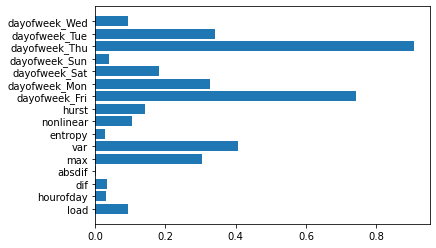

In [404]:
# Summarize Feature Importance
plt.barh(features, abs(logreg_model.coef_[0]))

In [277]:
# F1 for each appliance after 10-Fold cross-val
df_logreg_f1

,ac,ev,oven,wash,dryer
0,0.983722,0.901676,0.901976,0.667117,0.657201


In [278]:
# Prediction using Logistic Regression Model
df_logreg_pred.head()

,ac,ev,oven,wash,dryer
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


DF to CSV

In [76]:
# df_logreg_pred.insert(0, 'id', df_logreg_pred.index + 1)
# df_logreg_pred.head()
# df_logreg_pred.to_csv("logreg_Output.csv", index=False)

For Logistic Regression Model, `dayofweek_Thu` and `dayofweek_Fri` are presented as the most important variables. On the other hand, `load` seems to be not as much important as `var`, `max`. Although this model gives very high F1 score for **ac**, the F1 score for **wash** and **dryer** are not so good. At a first sight, Logistic Regression would be used for `ac`.

### 5.2. Random Forest Model

In [279]:
# Useful Packages
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [280]:
# Random Forest Model with K-Fold Cross-Validation
def build_Random_Forest_kfold(df_input, features, target, df_test, get_max=True, debugging=True):
    
    # Create balance data from unbalance
    df_in = get_balance_df(df_input, target, get_max=get_max, debugging=debugging)
    
    # Define predictors and target
    X = df_in[features]
    y = df_in[target]

    # Prepare cross-validation
    cv = KFold(n_splits=10, random_state=1234, shuffle=True)

    # Instance Model
    rf_model = RandomForestClassifier(n_estimators=50, 
                                      criterion='gini', 
                                      max_depth=5, 
                                      min_samples_split=2, 
                                      min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0,
                                      max_features='auto',
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      bootstrap=True,
                                      oob_score=False,
                                      n_jobs=-1,
                                      random_state=0,
                                      verbose=0,
                                      warm_start=False)
    rf_model.fit(X, y)
    rf_model.score(X, y)

    # Compute F1 score
    f1_val = cross_val_score(rf_model, X, y, scoring='f1', cv=cv, n_jobs=-1).mean()

    # Get predictions
    X_test = df_test[features]
    y_pred = rf_model.predict(X_test)
    
    return (f1_val, y_pred,rf_model)

In [281]:
# Takes 5-10 mins aprox to compute F1 and predicted values
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']

df_rf_f1 = pd.DataFrame(columns = appliances)
df_rf_pred = pd.DataFrame(columns = appliances)

for appliance in appliances:
    
    rf_f1, rf_pred, rf_model = build_Random_Forest_kfold(df_train_encode, features, appliance, df_test_encode, debugging=False)
    df_rf_f1[appliance] = [rf_f1]
    df_rf_pred[appliance] = rf_pred

<BarContainer object of 16 artists>

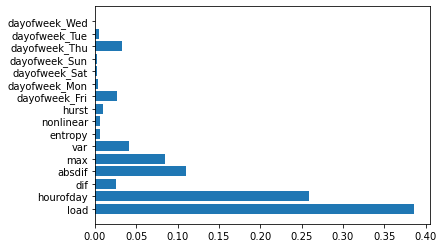

In [282]:
# Summarize Feature Importance
plt.barh(features, rf_model.feature_importances_)

In [283]:
# F1 for each appliance after 10-Fold cross-val
df_rf_f1

,ac,ev,oven,wash,dryer
0,0.986374,0.945304,0.948649,0.78014,0.81259


In [284]:
# Prediction using Random Forest Model
df_rf_pred.head()

,ac,ev,oven,wash,dryer
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


DF to CSV

In [ ]:
# df_rf_pred.insert(0, 'id', df_rf_pred.index + 1)
# df_rf_pred.head()
# df_rf_pred.to_csv("rf_Output.csv", index=False)

For Random Forest Model, `load` and `hourofday` are presented as the most important variables. On the other hand, `dayofweek` seems to be not as much important as `var`, `max` and `absdif`. Although this model gives very high F1 score for **ac**, the F1 score for **wash**  is not so good. At a first sight, Random Forest Model would be used for `ac`, `ev` and `oven`.

### 5.3. XG Boost Model

In [285]:
# Useful Packages
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [286]:
# XGBoost Model with K-Fold Cross-Validation
def build_XGBoost_kfold(df_input, features, target, df_test, get_max=True, debugging=True):
    
    # Create balance data from unbalance
    df_in = get_balance_df(df_input, target, get_max=get_max, debugging=debugging)
    
    # Define predictors and target
    X = df_in[features]
    y = df_in[target]

    # Instance model
    xgb_model=xgb.XGBClassifier(n_estimators=100, 
                                reg_lambda=1, 
                                gamma=0, 
                                max_depth=3)
    xgb_model.fit(X, y)
    xgb_model.score(X, y)
    
    # Prepare cross-validation
    cv = KFold(n_splits=10, random_state=1234, shuffle=True)

    # Compute F1 score
    f1_val = cross_val_score(xgb_model, X, y, scoring='f1', cv=cv, n_jobs=-1).mean()

    # Get predictions
    X_test = df_test[features]
    y_pred = xgb_model.predict(X_test)
    
    return (f1_val, y_pred,xgb_model)

In [287]:
# Takes 10-15 mins aprox to compute F1 and predicted values
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']

df_xgb_f1 = pd.DataFrame(columns = appliances)
df_xgb_pred = pd.DataFrame(columns = appliances)

for appliance in appliances:
    
    xgb_f1, xgb_pred, xgb_model= build_XGBoost_kfold(df_train_encode, features, appliance, df_test_encode, debugging=False)
    df_xgb_f1[appliance] = [xgb_f1]
    df_xgb_pred[appliance] = xgb_pred
    

C:\Users\Henry\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Henry\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Henry\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Henry\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Henry\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 16 artists>

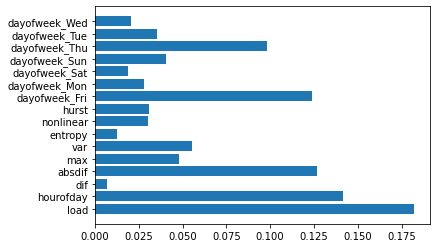

In [288]:
# Summarize Feature Importance
plt.barh(features, xgb_model.feature_importances_)

In [289]:
# F1 for each appliance after 10-Fold cross-val
df_xgb_f1

,ac,ev,oven,wash,dryer
0,0.993643,0.996313,0.987974,0.889447,0.896151


In [291]:
# Prediction using XGBoost Model
df_xgb_pred.head()

,ac,ev,oven,wash,dryer
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


DF to CSV

In [ ]:
# df_xgb_pred.insert(0, 'id', df_xgb_pred.index + 1)
# df_xgb_pred.head()
# df_xgb_pred.to_csv("xgb_Output.csv", index=False)

For XG Boost Model, `load`, `hourofday`, `absdif`, `dayofweek_Fri` and `dayofweek_Thu` are presented as the most important variables. On the other hand, `dayofweek` seems to be not as much important as `entropy`, and `dif`. Although this model gives very high F1 score for **ac**, the F1 score for **wash** and **dryer** are not so good. At a first sight, XG Boost Model would be used for `ac`, `ev` and `oven`.

### 5.4. SVM Model

In [292]:
# Useful Package
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

In [293]:
# SVM Model without K-Fold Cross-Validation
def build_svm_simple(df_input, features, target, df_test, get_max=True, debugging=True):
    
    # Create balance data from unbalance
    df_in = get_balance_df(df_input, target, get_max=get_max, debugging=debugging)
    
    # Define predictors and target
    X = df_in[features]
    y = df_in[target]

    # Prepare cross-validation
    #cv = KFold(n_splits=10, random_state=1234, shuffle=True)

    # Instance model
    svm_1 = LinearSVC(max_iter=1000)  #10000
    svm_1.fit(X, y)
    y_pre = svm_1.predict(X)
    
    # save the model to disk
    #filename = 'finalized_model.sav'
    #pickle.dump(svm_1, open(filename, 'wb'))

    # Compute F1 score
    f1_val = f1_score(y, y_pre, average='binary')
    #cross_val_score(svm_1, X, y, scoring='f1', cv=None, n_jobs=-1).mean()

    # Get predictions
    X_test = df_test[features]
    y_pred = svm_1.predict(X_test)
    
    return (f1_val, y_pred,svm_1)

In [294]:
# Takes 20 min aprox to compute F1 and predicted values
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']

df_svm_f1 = pd.DataFrame(columns = appliances)
df_svm_pred = pd.DataFrame(columns = appliances)

for appliance in appliances:
    
    svm_f1, svm_pred, svm_model = build_svm_simple(df_train_encode, features, appliance, df_test_encode, debugging=False)
    df_svm_f1[appliance] = [svm_f1]
    df_svm_pred[appliance] = svm_pred

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Henry\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

<BarContainer object of 16 artists>

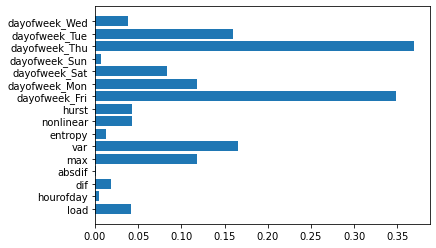

In [405]:
plt.barh(features, abs(svm_model.coef_[0]))

In [313]:
# F1 for each appliance
df_svm_f1

,ac,ev,oven,wash,dryer
0,0.980766,0.846637,0.856929,0.692638,0.508757


In [314]:
# Prediction using SVM Model
df_svm_pred.head()

,ac,ev,oven,wash,dryer
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


DF to CSV

In [ ]:
# df_svm_pred.insert(0, 'id', df_svm_pred.index + 1)
# df_svm_pred.head()
# df_svm_pred.to_csv("svm_Output.csv", index=False)

For SVM Model, `dayofweek_Fri` and `dayofweek_Thu` are presented as the most important variables. On the other hand, `dayofweek` seems to be not as much important as `absdif`, `hourifday` and `dayofweek_Sun`. Although this model gives very high F1 score for **ac**, the F1 score for **wash** and **dryer** are not so good. At a first sight, SVM Model would be used for `ac`.

### 5.5. Decision Tree Model

In [315]:
# Useful Package
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [316]:
# Decision Tree Model with K-Fold Cross-Validation
def build_DTree_kfold(df_input, features, target, df_test, get_max=True, debugging=True):
    
    # Create balance data from unbalance
    df_in = get_balance_df(df_input, target, get_max=get_max, debugging=debugging)
    
    # Define predictors and target
    X = df_in[features]
    y = df_in[target]

    # Prepare cross-validation
    cv = KFold(n_splits=10, random_state=1234, shuffle=True)

    # Instance model
    dt = DecisionTreeClassifier()
    dt.fit(X,y)

    # Compute F1 score
    f1_val = cross_val_score(dt, X, y, scoring='f1', cv=cv, n_jobs=-1).mean()

    # Get predictions
    X_test = df_test[features]
    y_pred = dt.predict(X_test)
    
    return (f1_val, y_pred,dt)

In [317]:
# Takes 10-15 mins aprox to compute F1 and predicted values
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']

df_dt_f1 = pd.DataFrame(columns = appliances)
df_dt_pred = pd.DataFrame(columns = appliances)

for appliance in appliances:
    
    dt_f1, dt_pred, dt_model= build_DTree_kfold(df_train_encode, features, appliance, df_test_encode, debugging=False)
    df_dt_f1[appliance] = [dt_f1]
    df_dt_pred[appliance] = dt_pred

<BarContainer object of 16 artists>

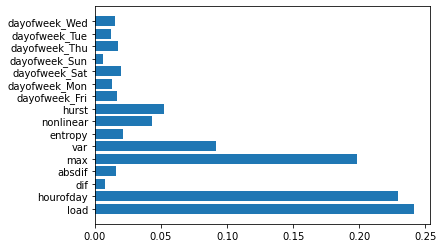

In [318]:
# Summarize Feature Importance
plt.barh(features, dt_model.feature_importances_)

In [320]:
# F1 for each appliance
df_dt_f1

,ac,ev,oven,wash,dryer
0,0.997275,0.999751,0.998868,0.996456,0.99755


In [321]:
# Prediction using Decision Tree Model
df_dt_pred.head()

,ac,ev,oven,wash,dryer
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


DF to CSV

In [ ]:
# df_dt_pred.insert(0, 'id', df_dt_pred.index + 1)
# df_dt_pred.head()
# df_dt_pred.to_csv("dt_Output.csv", index=False)

For Decision Tree Model, `load`, `hourofday` and `max` are presented as the most important variables. On the other hand, `dayofweek` and `dif` seem to be not as much important as `var`. Although this model gives very high F1 score for **ac**, the F1 score for **wash** and **dryer** are not so good. At a first sight, Decision Tree Model would be used for all appliance `ac`, `ev`, `oven`, `wash` and `dryer`.

## 6. Models Comparison
We have created 6 models and got their F1-score. The final task is to chose which model will be used to predict the appliance usage.

In [488]:
# Feature Importance for all models.
df_logref_fea = pd.DataFrame(abs(logreg_model.coef_[0])).T
df_rf_fea = pd.DataFrame(abs(rf_model.feature_importances_)).T
df_xgb_fea = pd.DataFrame(abs(xgb_model.feature_importances_)).T
df_svm_fea = pd.DataFrame(abs(svm_model.coef_[0])).T
df_dt_fea = pd.DataFrame(abs(dt_model.feature_importances_)).T
df_fea_import = pd.concat([df_logref_fea, df_rf_fea, df_xgb_fea, df_svm_fea, df_dt_fea], axis=0, ignore_index=True)
features = ['load', 'hourofday', 'dif', 'absdif', 'max', 'var', 'entropy', 'nonlinear', 'hurst',
           'dayofweek_Fri', 'dayofweek_Mon', 'dayofweek_Sat', 'dayofweek_Sun', 'dayofweek_Thu', 
            'dayofweek_Tue', 'dayofweek_Wed']
df_fea_import.columns = features
df_fea_import_T = df_fea_import.T
df_fea_import_T.columns = ['Logistic Regression', 'Random Forest', 'XG Boost', 'SVM', 'Decision Tree']
df_fea_import_T.reset_index(inplace=True)
df_fea_import_T = df_fea_import_T.rename(columns={'index': 'Features'})
df_fea_import_T.head()

,Features,Logistic Regression,Random Forest,XG Boost,SVM,Decision Tree
0,load,0.094798,0.385796,0.181951,0.042031,0.241286
1,hourofday,0.031806,0.258860,0.141804,0.004659,0.229593
2,dif,0.035003,0.025233,0.006604,0.019065,0.007872
3,absdif,0.003099,0.109798,0.126520,0.001147,0.015634
4,max,0.304772,0.084371,0.048130,0.118144,0.198013


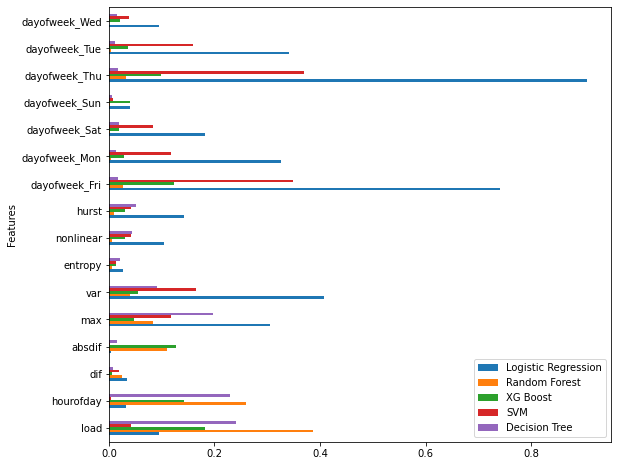

In [489]:
# Plot Feature Importance
df_fea_import_T.plot(x='Features', 
                     y=['Logistic Regression', 'Random Forest', 'XG Boost', 'SVM', 'Decision Tree'], 
                     kind="barh",figsize=(9,8))
plt.show()

From the previous plot, the models that were built present differences feature importance. At the very beginning, the assumption was `load` would be as part of the most important feature for all models, but at this stage, `dayofweek_Thu` and `dayofweek_Fri` appear to be more representative. `dif` and `entropy` seem to have very low impact when building those models.

In [334]:
# Create FataFrame to compare models
df_f1_final = pd.concat([df_logreg_f1, df_rf_f1, df_xgb_f1, df_svm_f1, df_dt_f1], axis=0, ignore_index=True)
df_f1_final['model'] = ['Logistic Regression', 'Random Forest', 'XG Boost', 'SVM', 'Decision Tree']
df_f1_final = df_f1_final.loc[:,['model', 'ac', 'ev', 'oven', 'wash', 'dryer']]
df_f1_final

,model,ac,ev,oven,wash,dryer
0,Logistic Regression,0.983722,0.901676,0.901976,0.667117,0.657201
1,Random Forest,0.986374,0.945304,0.948649,0.780140,0.812590
2,XG Boost,0.993643,0.996313,0.987974,0.889447,0.896151
3,SVM,0.980766,0.846637,0.856929,0.692638,0.508757
4,Decision Tree,0.997275,0.999751,0.998868,0.996456,0.997550


In [402]:
# Get best score and model for each appliance
df_best = pd.DataFrame(columns = ['Appliance', 'Best_Model', 'F1_Score'])
appliances = ['ac', 'ev', 'oven', 'wash', 'dryer']

for appliance in appliances:
    best_model = df_f1_final.loc[df_f1_final[appliance] == df_f1_final[appliance].max(), 'model']
    best_score = df_f1_final.loc[df_f1_final[appliance] == df_f1_final[appliance].max(), appliance]
    df_best = df_best.append({'Appliance': appliance, 
                              'Best_Model': best_model.values[0], 
                              'F1_Score': best_score.values[0]}, ignore_index=True)

In [403]:
df_best

,Appliance,Best_Model,F1_Score
0,ac,Decision Tree,0.997275
1,ev,Decision Tree,0.999751
2,oven,Decision Tree,0.998868
3,wash,Decision Tree,0.996456
4,dryer,Decision Tree,0.997550


DF to CSV

In [2]:
df_dt_pred.insert(0, 'id', df_dt_pred.index + 1)
df_dt_pred.head()
df_dt_pred.to_csv("pred_labels.csv", index=False)

## 7. Conclusion
- There have been built **5** models which include `Logistic Regression`, `Random Forest`, `XG Boost`, `SVM` and `DEcision Tree`. Each of them were built for predicting target variables such as `ac`, `ev`, `oven`, `wash` and `dryer` which correspond whether those appliances are tourned on or off. For measuring the performance of each model, a F1 scored were used for comparing which model are the best for each appliance usage prediction.

- Originally, the dataset given was processing as time series when the order of rows matters. In such sense, a feature extraction task was performed using `TSfresh` package. Basically, the idea in that section was to extract features having in mind the data set will be process by setting a window size of 5, 10 and 15 rows. While the window size increases its value, the process itself takes more time and sources as well, being the most time-consumiing task in this analysis. This approach has been done for both Training and Testing Dataset. Lately, the feature extraction was considered as optional so we decide to include the section just in case a deep analysis wants to be analyzed. 

- The model chosen for making prediction in all appliances was `Decision Tree` beacuse this models gave the highest value of F1 score for all the appliance. For getting better results, this model's hyperparameters might be tunned for improving its F1 score. The tuning process could be included for each model too.

## 8. References
The folloing sources have been used while doing this assignment.
- https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
- https://machinelearningmastery.com/feature-selection-machine-learning-python/
- https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html
- https://tsfresh.readthedocs.io/en/latest/text/forecasting.html
- https://tsfresh.readthedocs.io/en/latest/text/feature_filtering.html
- https://tsfresh.readthedocs.io/en/latest/text/quick_start.html
- https://medium.datadriveninvestor.com/time-series-classification-using-feature-extraction-16209570a22e
- https://towardsdatascience.com/ultimate-pandas-guide-time-series-window-functions-a5362b782f3e
- https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e
- https://www.kaggle.com/malekzadeh/smart-home-data-processing-weather-vs-energy
- https://www.kaggle.com/msand1984/appliance-energy-prediction
- https://github.com/pipette/Electricity-load-disaggregation/blob/master/python_notebooks/Sandbox%20EDA%26HMM.ipynb
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/
- https://regenerativetoday.com/a-complete-guide-to-time-series-analysis-in-pandas/